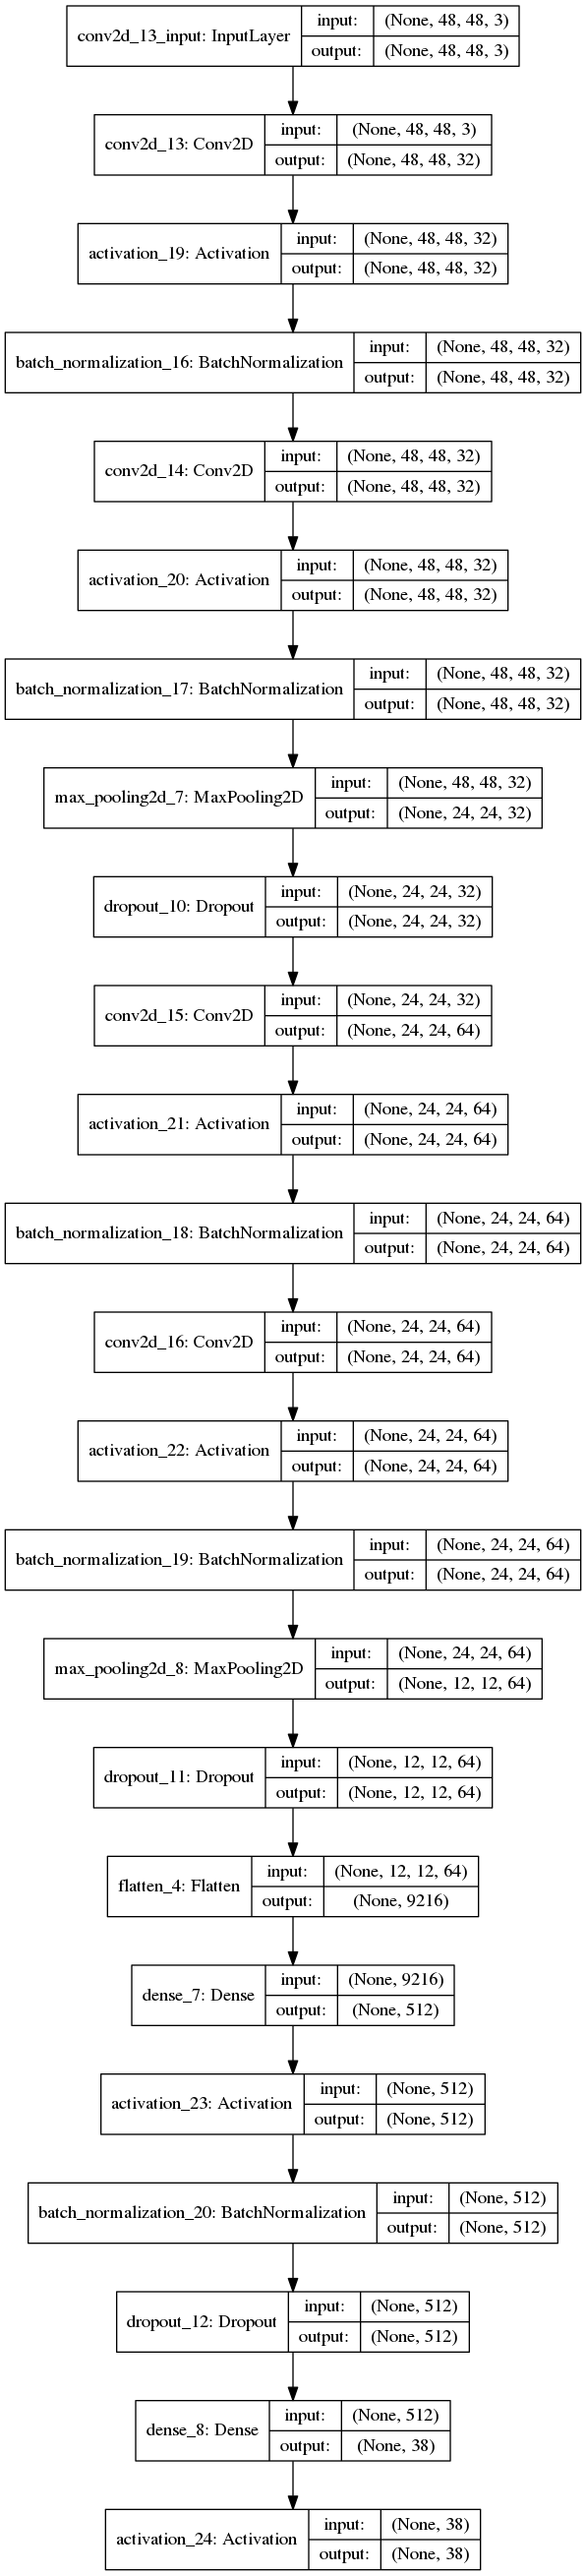

In [4]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

from keras.utils import plot_model
from IPython.display import Image


width   = 48
height  = 48
depth   = 3
classes = 38

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

if K.image_data_format() == 'channels_first':
    inputShape = (depth, height, width)
    chanDim = 1
    
# block1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# block 3
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes))
model.add(Activation('softmax'))


plot_model(model, to_file='MiniVGGNet.png', show_shapes=True)
Image('MiniVGGNet.png')